### Project 1 . 
#### 10개의 feature를 선택하여 linear regression과 random forest regression을 사용해서 end point 구하기

In [1]:
import pandas as pd
csv_file_name = "qsar_input_file.csv"
sample_data = pd.read_csv(csv_file_name, sep=',')

X_data = sample_data.iloc[:,1:-1] # feature
y_data = sample_data.iloc[:,-1:] # end_point

 ## Remove empty feature

In [2]:
X_data = X_data.dropna(axis=1)

### 중복 행 제거

In [3]:
X_data.drop_duplicates()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,2.8332,8.027022,15.5429,6.481000,0,0,5,5,0,...,29.582709,8.500000,1.700000,9.000000,0.000000,0.000000,16.0,0.0,2.791,20.0
1,0,0.6494,0.421720,13.7114,7.993379,0,0,9,6,3,...,11.112622,10.465990,1.744332,9.237437,2.332107,0.000000,28.0,3.0,0.926,24.0
2,1,0.8583,0.736679,13.6539,7.461793,0,0,8,7,1,...,14.249108,12.293055,1.756151,11.587713,4.654701,0.000000,42.0,6.0,0.619,30.0
3,0,2.7863,7.763468,27.3736,11.731000,0,0,8,8,0,...,23.237721,14.062500,1.757812,13.875000,0.000000,0.000000,58.0,9.0,3.471,38.0
4,0,0.6467,0.418221,17.4897,10.977172,0,0,12,8,4,...,11.001652,14.271680,1.783960,11.777389,2.362609,0.000000,62.0,9.0,1.291,34.0
5,0,1.5684,2.459879,17.0404,7.371000,0,0,6,6,0,...,19.327344,10.523646,1.753941,9.301424,0.000000,0.000000,29.0,4.0,1.643,22.0
6,0,2.3059,5.317175,36.1703,17.324965,0,0,15,10,5,...,9.735622,19.299499,1.929950,7.118022,0.000000,0.000000,114.0,11.0,2.329,48.0
7,0,1.1092,1.230325,39.7201,19.091758,0,0,17,11,6,...,9.473249,21.156414,1.923310,9.631554,0.000000,2.511186,148.0,13.0,1.204,54.0
8,0,2.5192,6.346369,39.3880,19.362172,0,0,17,13,4,...,11.236436,25.013203,1.924093,14.989086,4.828824,3.027184,240.0,17.0,1.913,64.0
9,0,2.6746,7.153485,40.8865,18.838172,0,0,15,11,4,...,11.999691,21.156620,1.923329,9.630425,0.000000,0.000000,152.0,13.0,2.273,54.0


### 0값 가진 descriptor 삭제

In [4]:
X_data = X_data.loc[:, (X_data != 0).any(axis=0)]

### 최대값과 최소값의 비율이 무한대 -> 제거

In [5]:
import numpy as np
from numpy import inf

mins = np.array(X_data.min())
maxs = np.array(X_data.max())
dd = maxs/mins
ddd = list(maxs/mins)
dddd = pd.DataFrame(ddd)
print(dddd.replace([inf],0))

               0
0       0.000000
1      87.647632
2    7682.107450
3       3.649142
4       4.333333
..           ...
976     0.000000
977   102.250000
978     0.000000
979    12.617124
980     7.500000

[981 rows x 1 columns]


/tmp/ipykernel_249/1189060318.py:6: RuntimeWarning: divide by zero encountered in true_divide
  dd = maxs/mins
/tmp/ipykernel_249/1189060318.py:7: RuntimeWarning: divide by zero encountered in true_divide
  ddd = list(maxs/mins)


In [6]:
index_zero = dddd.index[dddd[0] == 0].tolist()

In [7]:
# 숫자 인덱스로 행 제거
X_data = X_data.drop(X_data.columns[[132,141, 150, 159, 168, 177, 186, 195, 204, 213, 222, 231, 240, 249, 257, 265, 273, 281, 289, 297, 305, 371, 397, 410, 423, 610, 671, 673, 676, 683, 684, 688, 706, 707, 708, 711, 718, 719, 944]], axis=1)

### 10개 descriptor 랜덤 추출

In [8]:
ss = ['SpMin1_Bhv', 'SHBint3', 'GGI5', 'VR3_Dt', 'GGI9', 'ASP-4', 'MATS6p', 'TIC3', 'SpAD_D', 'VR2_Dt']

In [9]:
test1 = X_data[ss]

### Data scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
header = list(test1.columns.values)
scaler = MinMaxScaler()
test1_scaled = scaler.fit_transform(test1)
test1 = pd.DataFrame(test1_scaled, columns = header)

### 데이터 분할

In [11]:
from sklearn.model_selection import train_test_split
test1 = np.array(test1)
y_data = np.array(y_data)
x_train, x_test, y_train, y_test = train_test_split(test1, y_data, random_state=777)
print(y_train[:3])

[[2.858]
 [5.067]
 [4.099]]


### Linear Regression

Model			 RMSE 		 R2
LinearRegression 	 1.44 		-0.04


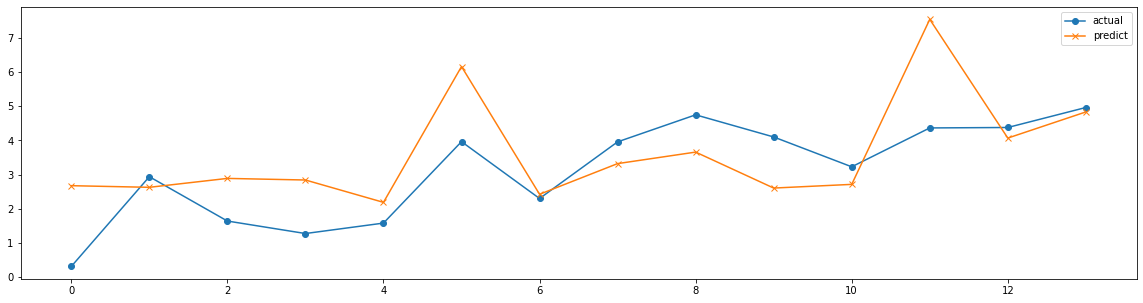

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print("Model\t\t\t RMSE \t\t R2")
print("LinearRegression \t {:.2f} \t\t{:.2f}".format(np.sqrt(mean_squared_error(y_test, pred_lr)), r2_score(y_test, pred_lr)))

fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(20,5)

ax1.plot(y_test, marker = "o" , label = "actual")
ax1.plot(pred_lr, marker = "x", label = "predict")
ax1.legend(prop={'size':10})